Analysis crimes in San Francisco 

In [65]:
from folium import plugins, CircleMarker, Map, LayerControl
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)

In [64]:
df = pd.read_csv('https://www.dropbox.com/s/vagv6b149d57qno/train.csv?dl=1')

In [5]:
m = Map([37.774599, -122.425892], zoom_start=11)

In [22]:
category_dict = mapping(sorted(df['Category'].unique()))

In [6]:
for index, row in df.sample(frac=1)[:1000].iterrows():
    CircleMarker(
        [row['Y'], row['X']],
        radius=1,
        popup=row['Descript'],
        fill_color="#3db7e4", # divvy color
    ).add_to(m)

In [7]:
arr = df[['Y', 'X']][:1000].values
m.add_child(plugins.HeatMap(arr, radius=15))

In [54]:
LA_COORDINATES = (37.774599, -122.425892)

# create empty map zoomed in on San Francisco
map = Map(location=LA_COORDINATES, zoom_start=12) 

plugins.FastMarkerCluster(data=list(zip(df['Y'][:10000], df['X'][:10000]))).add_to(map)

LayerControl().add_to(map)
    
display(map)

In [3]:
def mapping(items):
    return {x: i for i, x in enumerate(items)}

In [66]:
df['Dates'] = pd.to_datetime(df['Dates'],format='%Y-%m-%d %H:%M:%S')

In [67]:
dayOfWeek = dict(df['DayOfWeek'].value_counts())
pd_district_dict = mapping(sorted(df['PdDistrict'].unique()))
unique_years = OrderedDict(sorted(df['Dates'].dt.strftime("%Y").value_counts().items()))
data_week_dict = mapping(sorted(df['DayOfWeek'].unique()))

In [37]:
data = [go.Bar(x=list(dayOfWeek.keys()), y=list(dayOfWeek.values()))]

# specify the layout of our figure
layout = dict(title = "Count of crimes by day of week",
              xaxis= dict(ticklen= 5,zeroline= False))

# create and show our figure
fig = dict(data = data, layout = layout)
iplot(fig)

In [68]:
df['DayOfWeek'] = df['DayOfWeek'].replace(data_week_dict)
df['Category'] = df['Category'].replace(category_dict)
df['PdDistrict'] = df['PdDistrict'].replace(pd_district_dict)

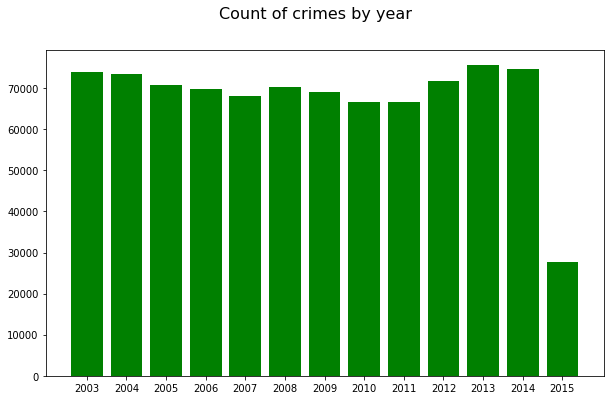

In [14]:
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')

ax.bar(unique_years.keys(), unique_years.values(), facecolor='g')
ax.set_xticklabels(unique_years.keys())
fig.suptitle('Count of crimes by year', fontsize=16)
plt.show()

In [69]:
features = ["DayOfWeek", "PdDistrict",  "X", "Y"]
df_X = df[features]
df_Y = df["Category"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [36]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Accuracy: 0.2233244120494277
Mean Absolute Error: 11.095347645350493
Mean Squared Error: 223.73574397813337
Root Mean Squared Error: 14.957798767804485


In [15]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=3)
#fit model to data
knn_gscv.fit(X_train, y_train)
print(knn_gscv.best_params_)

/home/arthur264/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 29}


In [20]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

/home/arthur264/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arthur264/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Accuracy: 0.1990490290985707
Mean Absolute Error: 8.63790216958032
Mean Squared Error: 125.44550993679175
Root Mean Squared Error: 11.200245976619966


In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for name, clf in zip(names, classifiers):
    clf.fit(X_train[:10000], y_train[:10000])
    score = clf.score(X_test, y_test)
    print('score: ',name,score)


score:  Nearest Neighbors 0.17069073515175673
